ax = plt.gca() 是一个用于获取当前图形（current axes）的方法，其中 plt 是 matplotlib.pyplot 库的别名。这个方法的作用是获取当前正在操作的图形（图表）的坐标轴对象，以便对其进行进一步的设置和定制。

具体来说，`plt.gca()` 返回一个Axes对象，您可以使用这个对象来修改图表的属性、添加标签、设置刻度等等。以下是一些示例用法：

1. 设置坐标轴标签：
`ax.set_xlabel('X轴标签')`
`ax.set_ylabel('Y轴标签')`

2. 设置刻度范围：
`ax.set_xlim(0, 100)`  # 设置X轴刻度范围
`ax.set_ylim(0, 1)`    # 设置Y轴刻度范围

3. 添加网格线：
`ax.grid(True)`  # 添加网格线

4. 添加标题：
`ax.set_title('图表标题')`

5. 自定义刻度标签：
`ax.set_xticks([0, 50, 100])`  # 设置X轴刻度位置
`ax.set_xticklabels(['低', '中', '高'])`  # 设置X轴刻度标签

通过获取当前坐标轴对象 ax，您可以对图表进行各种自定义和修改操作，以满足您的可视化需求。这是Matplotlib库中常用的技巧之一，用于定制和调整绘图的外观和属性。

   sex       age  ph.ecog
0    1  62.45815        1
1    2  62.45815        1


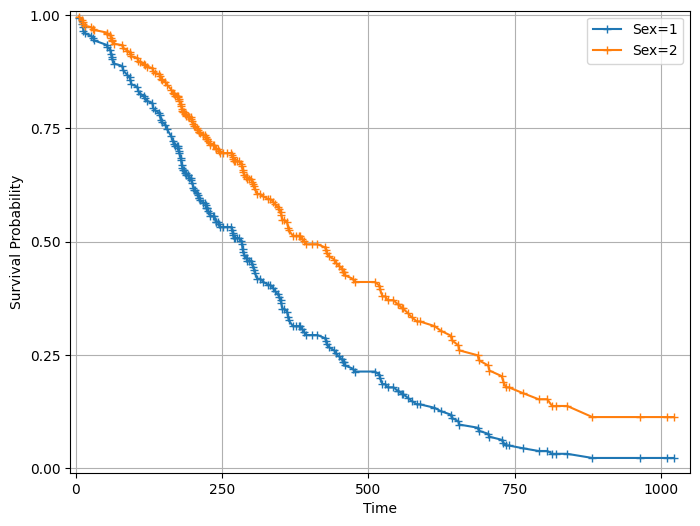

In [1]:
import pandas as pd
from lifelines.datasets import load_lung

# Load the lung dataset
data = load_lung()

# Drop rows with missing values in the specified columns
data_filtered = data.dropna(subset=['age', 'sex', 'ph.ecog', 'time', 'status'])

# Create the new data DataFrame
sex_df = pd.DataFrame({
    'sex': [1, 2],
    'age': [data_filtered['age'].mean(), data_filtered['age'].mean()],
    'ph.ecog': [1, 1]
})

print(sex_df)


import pandas as pd
from lifelines.datasets import load_lung
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator


# Fit the Cox proportional hazards model
cph = CoxPHFitter()
cph.fit(data_filtered, duration_col='time', event_col='status', 
        formula='age + sex + ph.ecog')

# Estimate the survival curves for the new data
fit = cph.predict_survival_function(sex_df)

# Plot the survival curves
plt.figure(figsize=(8, 6))
for i, sex_value in enumerate(sex_df['sex']):
    plt.plot(fit.index, fit.iloc[:, i], label=f'Sex={sex_value}', marker = "+")

plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()
x_major_locator=MultipleLocator(250)
y_major_locator=MultipleLocator(0.25)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim(-10,1050)
plt.ylim(-0.01,1.01)
plt.grid(True)
plt.show()